In [1]:
import audb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
def vis_hist(df, x='emotion', hue=None, hue_order=None, title=None):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    sns.histplot(data=df, x=x, hue=hue, ax=ax, multiple='dodge', hue_order=hue_order, shrink=.8)
    if title is not None:
        ax.set_title(title)
    if hue is not None:
        move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, title_fontsize=14)

,emotion,emotion.confidence,speaker,gender
file,,,,
wav/03a01Fa.wav,happiness,0.90,3,male
wav/03a01Nc.wav,neutral,1.00,3,male
wav/03a01Wa.wav,anger,0.95,3,male
wav/03a02Fc.wav,happiness,0.85,3,male
wav/03a02Nc.wav,neutral,1.00,3,male
...,...,...,...,...
wav/16b10Lb.wav,boredom,1.00,16,female
wav/16b10Tb.wav,sadness,0.90,16,female
wav/16b10Td.wav,sadness,0.95,16,female


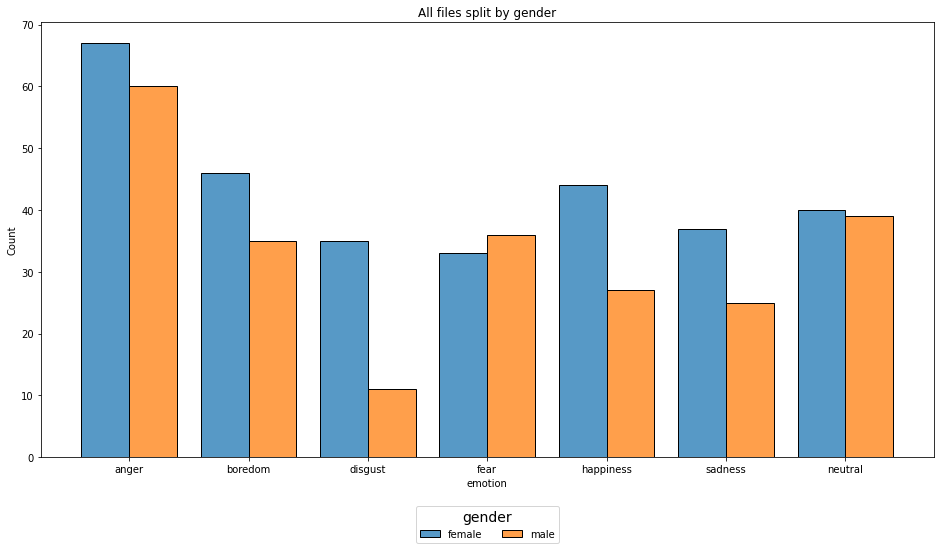

In [2]:
db = audb.load(
    name='emodb',
    version='1.1.1',
    format='wav',
    sampling_rate=16000,
    mixdown=True,
    only_metadata=True,
    full_path=False,
    verbose=False,
)
emotion_df = db.tables['emotion'].get()
meta = db.tables["files"].get(index=emotion_df.index)
meta["gender"] = meta["speaker"].apply(lambda x: db.schemes["speaker"].labels[x]["gender"])
emotion_df.loc[emotion_df.index, "speaker"] = meta["speaker"]
emotion_df.loc[emotion_df.index, "gender"] = meta["gender"]
display(emotion_df)
vis_hist(emotion_df, hue='gender', title='All files split by gender', hue_order=['female', 'male'])

In [3]:
speaker_df = pd.DataFrame.from_dict(db.schemes["speaker"].labels, orient="index")
speaker_df

,gender,age,language
3,male,31,deu
8,female,34,deu
9,female,21,deu
10,male,32,deu
11,male,26,deu
12,male,30,deu
13,female,32,deu
14,female,35,deu
15,male,25,deu
16,female,31,deu


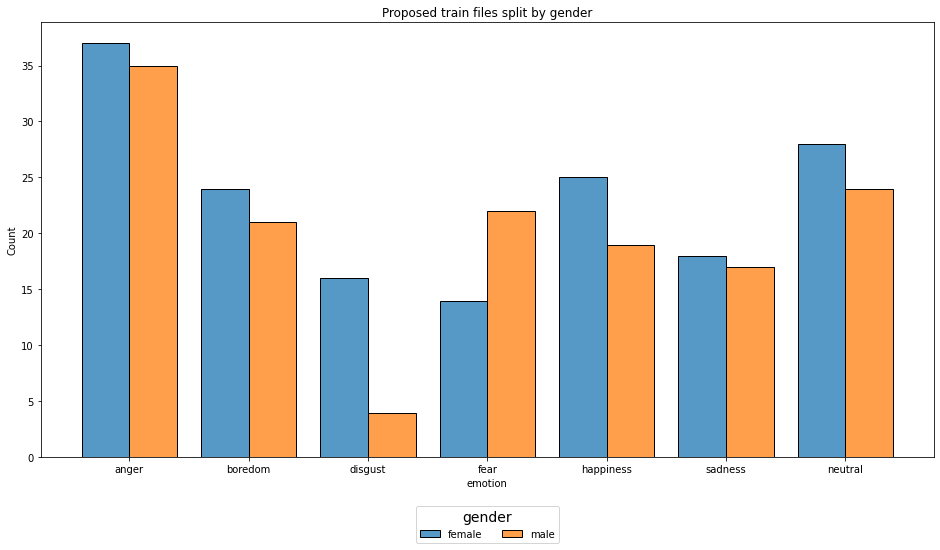

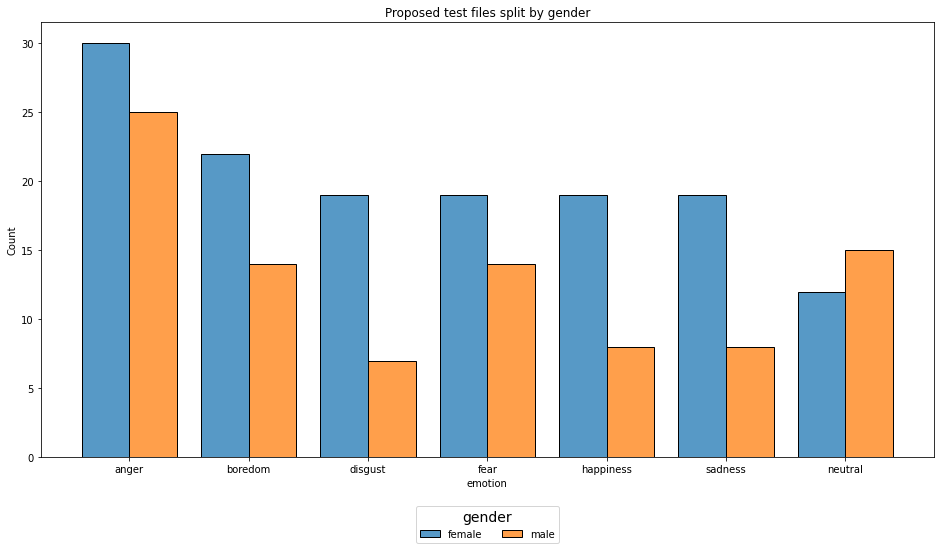

In [4]:
train_df = emotion_df[emotion_df['speaker'].isin([3, 8, 9, 10, 11, 13,])]
test_df = emotion_df[emotion_df['speaker'].isin([12, 14, 15, 16,])]

vis_hist(train_df, hue='gender', title='Proposed train files split by gender', hue_order=['female', 'male'])
vis_hist(test_df, hue='gender', title='Proposed test files split by gender', hue_order=['female', 'male'])